# DATA SCIENCE INTERNSHIP - BHARAT INTERN

# Name:M M Satya Sai Varma

# TASK 1 : STOCK PREDICTION

AIM : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

DATASET INFORMATION:

  Netflix STOCK PREDICTION

The dataset comprises historical data related to Netflix stock prices and various associated attributes. it contains 7 columns and a smaller subset of 252 rows

The columns in the dataset are as follows:

Date: Indicates the year and date of the stock data.
Close: Denotes the closing price of Netflix's stock on a particular day.   
High: Represents the highest value reached by Netflix's stock on the given day.                                                                       
Low: Represents the lowest value reached by Netflix's stock on the given   day.                                                                     
Open: Indicates the opening value of Netflix's stock on the given day.     
Volume: Represents the trading volume of Netflix's stock on the given day, i.e., the number of shares traded.



# code

In [44]:
# Importing libraries for data analysis and visualization
import numpy as np # For linear algebra operations
import pandas as pd # For data preprocessing and manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For enhanced data visualization
%matplotlib inline

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for machine learning and deep learning
from sklearn.preprocessing import MinMaxScaler # For data normalization
from keras.models import Sequential # For creating a sequential neural network model
from keras.layers import Dense, Dropout, LSTM, Bidirectional 

In [46]:
# Data importing: Reading the CSV file into a DataFrame
df = pd.read_csv("C:/Users/satya/Downloads/NFLX (1).csv")

# Fetching the first 10 rows of the dataset for quick inspection
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-09,229.619995,234.779999,229.619995,233.570007,233.570007,6699600
1,2022-09-12,233.610001,239.490005,233.369995,236.529999,236.529999,6047400
2,2022-09-13,226.500000,227.690002,217.720001,218.130005,218.130005,8000100
3,2022-09-14,219.820007,228.000000,215.800003,224.119995,224.119995,8230300
4,2022-09-15,230.470001,242.289993,229.100006,235.380005,235.380005,19454100
5,2022-09-16,231.220001,241.360001,227.830002,240.130005,240.130005,18914200
6,2022-09-19,245.050003,245.250000,235.750000,243.630005,243.630005,17912400
7,2022-09-20,240.369995,250.490005,239.660004,242.850006,242.850006,16037400
8,2022-09-21,242.669998,248.300003,236.679993,236.869995,236.869995,9166800
9,2022-09-22,235.350006,240.500000,231.660004,237.050003,237.050003,10018000


In [47]:
# Printing the shape of the DataFrame (number of rows and columns)
print("Shape of data:", df.shape)

Shape of data: (251, 7)


In [48]:
# Computing the statistical description of the DataFrame
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,340.221792,346.202390,334.989363,340.830758,340.830758,8.424775e+06
std,65.447233,65.502707,65.403177,65.553443,65.553443,5.261423e+06
min,212.690002,223.669998,211.729996,214.289993,214.289993,2.657900e+06
25%,296.070007,299.760010,288.850006,294.955001,294.955001,5.137000e+06
50%,329.970001,332.950012,324.000000,329.929993,329.929993,6.901100e+06
75%,403.945007,411.734985,399.365005,404.035004,404.035004,9.576750e+06
max,476.859985,485.000000,470.000000,477.589996,477.589996,4.668530e+07


In [49]:
# Summary of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [50]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,Open,Close
Date,,
2022-09-09,229.619995,233.570007
2022-09-12,233.610001,236.529999
2022-09-13,226.500000,218.130005
2022-09-14,219.820007,224.119995
2022-09-15,230.470001,235.380005
2022-09-16,231.220001,240.130005
2022-09-19,245.050003,243.630005
2022-09-20,240.369995,242.850006
2022-09-21,242.669998,236.869995


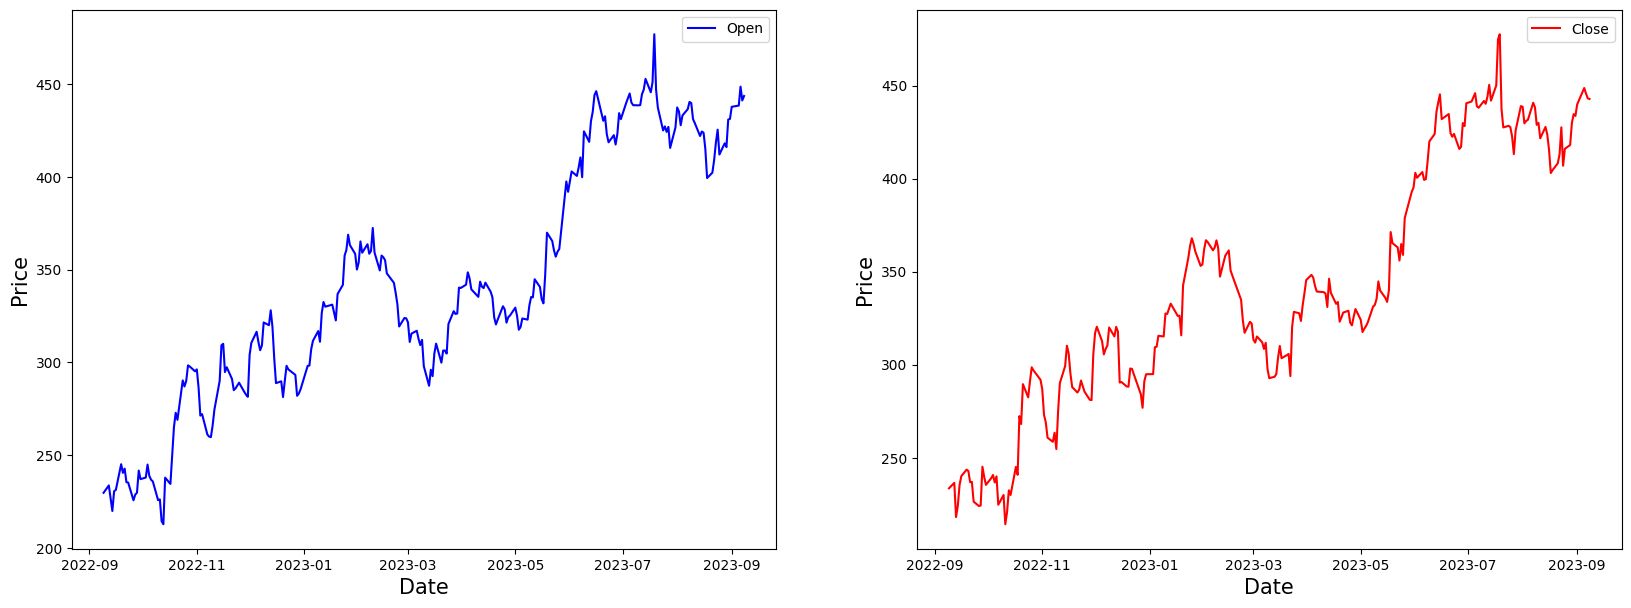

In [51]:
import matplotlib.pyplot as plt

# Creating a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plotting the open prices
ax[0].plot(df['Open'], label='Open', color='blue')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

# Plotting the closing prices
ax[1].plot(df['Close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

# Displaying the plots
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
MMS = MinMaxScaler()

# Applying Min-Max Scaling to normalize all values in the DataFrame
df[df.columns] = MMS.fit_transform(df)

# Displaying the first 10 rows of the normalized DataFrame
df.head(10)

,Open,Close
Date,,
2022-09-09,0.064087,0.073225
2022-09-12,0.079191,0.084466
2022-09-13,0.052277,0.014584
2022-09-14,0.026990,0.037334
2022-09-15,0.067305,0.080099
2022-09-16,0.070144,0.098139
2022-09-19,0.122497,0.111432
2022-09-20,0.104781,0.108469
2022-09-21,0.113488,0.085758


In [53]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

188

In [54]:
# Assuming 'training_size' has been defined before this code snippet
# and represents the number of rows to be used for training the model.

# Slicing the DataFrame 'df' to create 'train_data' containing the first 'training_size' rows
train_data = df[:training_size]

# Slicing the DataFrame 'df' to create 'test_data' containing the remaining rows after 'training_size'
test_data = df[training_size:]

# Printing the shapes of the newly created 'train_data' and 'test_data'
print(train_data.shape, test_data.shape)

(188, 2) (63, 2)


In [55]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [56]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((138, 50, 2), (138, 2), (13, 50, 2), (13, 2))

In [57]:
# Importing the required modules from Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Creating a Sequential model
model = Sequential()

# Adding an LSTM layer with 50 units, return_sequences=True is used to pass output to the next LSTM layer
# input_shape represents the shape of input sequences in the format (number_of_timesteps, number_of_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

# Adding a Dropout layer to avoid overfitting (10% of the neurons will be randomly excluded during training)
model.add(Dropout(0.1))

# Adding another LSTM layer with 50 units (return_sequences=False by default for the last LSTM layer)
model.add(LSTM(units=50))

# Adding a Dense layer with 2 neurons (output layer)
model.add(Dense(2))

# Compiling the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Displaying the summary of the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 156ms/step - loss: 0.1574 - mean_absolute_error: 0.3696 - val_loss: 0.1061 - val_mean_absolute_error: 0.2864
Epoch 2/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.1288 - val_loss: 0.0066 - val_mean_absolute_error: 0.0645
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0154 - mean_absolute_error: 0.1000 - val_loss: 0.0447 - val_mean_absolute_error: 0.1791
Epoch 4/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0918 - val_loss: 0.0557 - val_mean_absolute_error: 0.2288
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0782 - val_loss: 0.0282 - val_mean_absolute_error: 0.1559
Epoch 6/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0083 - mean_absolute_error: 0.0742 - val_loss: 0.0141 - val_mean_absolute_error: 0.1008
Epoch 7/100
5/5 [==========

In [59]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

1/1 [==============================] - 0s 469ms/step


array([[0.67650586, 0.6671002 ],
       [0.65893626, 0.64743036],
       [0.65651876, 0.64141506],
       [0.6575294 , 0.6391955 ],
       [0.6613325 , 0.64123356]], dtype=float32)

In [60]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[391.40253, 389.93747],
       [386.7612 , 384.75842],
       [386.12256, 383.1746 ],
       [386.38953, 382.59018],
       [387.3942 , 383.12677]], dtype=float32)

In [62]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-13:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-13:].index)], axis=1)

In [63]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-08-22,409.000000,413.170013,391.402527,389.937469
2023-08-23,418.399994,427.549988,386.761200,384.758423
2023-08-24,425.410004,406.929993,386.122559,383.174591
2023-08-25,412.000000,416.029999,386.389526,382.590179
2023-08-28,418.040009,418.059998,387.394196,383.126770


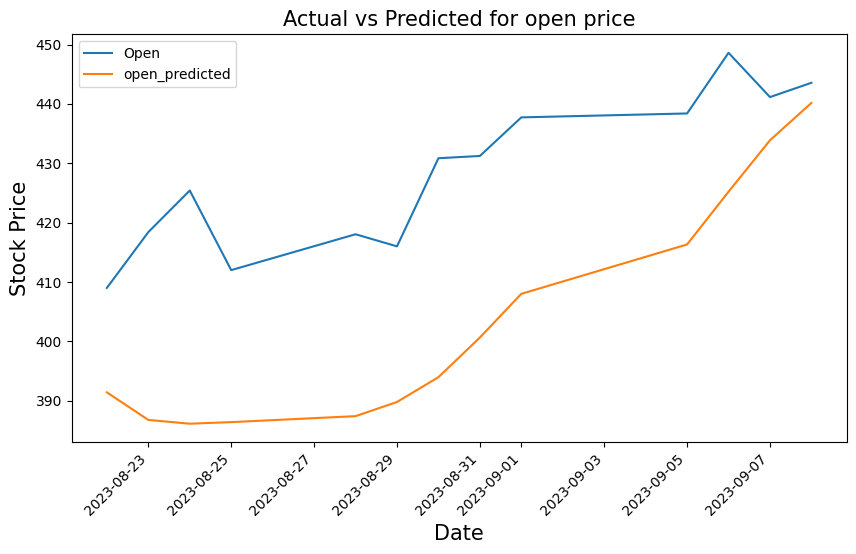

In [64]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

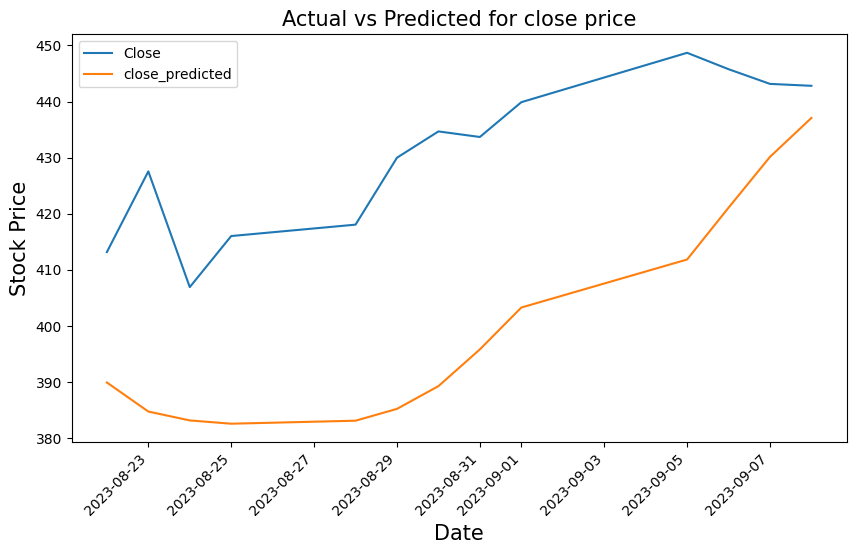

In [65]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [66]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [67]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 16ms/step


In [68]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

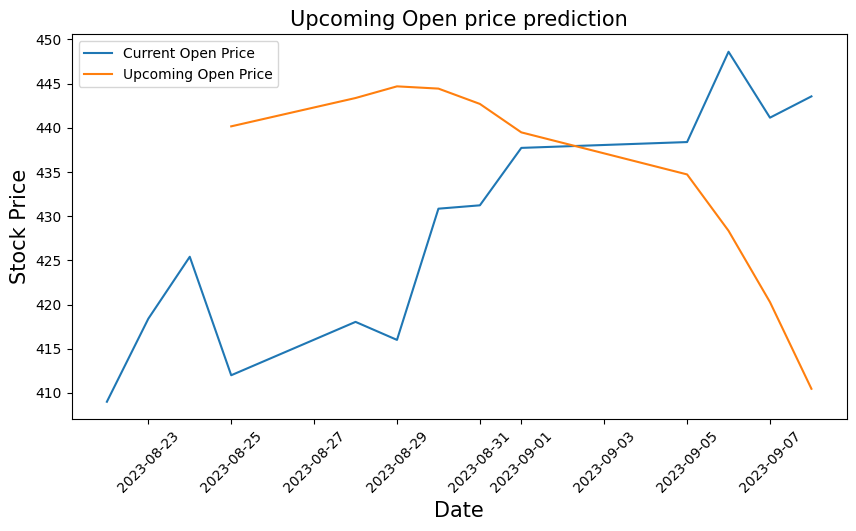

In [73]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-1-10':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-1-10':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

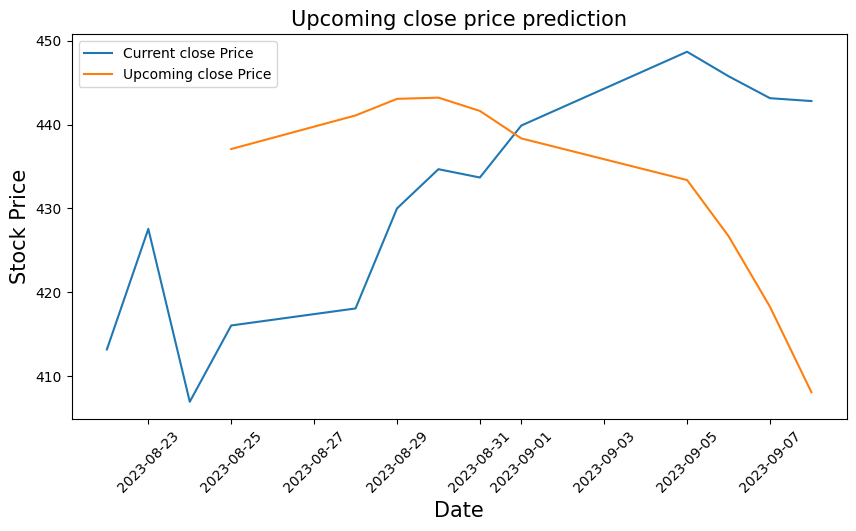

In [71]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-02-10':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2023-02-10':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

THANKYOU!!!!